#### Connecting to google drive:

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## i)

## Imports:

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report

## Reading Images:

In [ ]:
img1=plt.imread("/content/drive/MyDrive/Machine Learning/Week 8/images/featured-geometric.jpg")
img2=plt.imread("/content/drive/MyDrive/Machine Learning/Week 8/images/mosaic.jpg")

#### Setting path to save

In [ ]:
path="/content/drive/MyDrive/Machine Learning/Week 8"

#### Convolution of image:

In [ ]:
def convolution(image,kernel):
  x_image_shape=image.shape[0]
  y_image_shape=image.shape[1]
  x_kernel_shape=kernel.shape[0]
  y_kernel_shape=kernel.shape[1]
  output_image=np.zeros((x_image_shape,y_image_shape))
  padded_image=np.pad(image,x_kernel_shape-2)
  # print(out.shape)
  for x in range(0,image.shape[0]):
    for y in range(0,image.shape[1]):
      temp=padded_image[x:x+x_kernel_shape,y:y+y_kernel_shape]
      # print(temp.shape)
      output_image[x,y]=np.sum(np.multiply(temp,kernel))
      
  return output_image

#### Setting the kernels:

In [ ]:
kernel1=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
kernel2=np.array([[0,-1,0],[-1,8,-1],[0,-1,0]])

#### Testing the images with kernel 1:

In [ ]:
# Taking into consideration only the red channel:
conv1=convolution(img1[::,::,0],kernel1)
conv2=convolution(img2[::,::,0],kernel1)

#### Testing the images with kernel 2:

In [ ]:
# Taking into consideration only the red channel:
conv3=convolution(img1[::,::,0],kernel2)
conv4=convolution(img2[::,::,0],kernel2)

#### Saving the resultant images after applying kernel 1:

In [ ]:
cv2.imwrite(os.path.join(path,'result1_k1.jpg'),conv1)
cv2.imwrite(os.path.join(path,'result2_k1.jpg'),conv2)

True

#### Saving the resultant images after applying kernel 2:

In [ ]:
cv2.imwrite(os.path.join(path,'result1_k2.jpg'),conv3)
cv2.imwrite(os.path.join(path,'result2_k2.jpg'),conv4)

True

## ii) b)

orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_2 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense (Dense)  

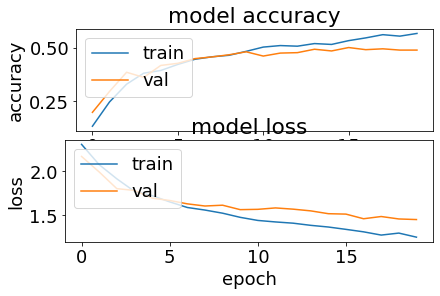

157/157 [==============================] - 2s 13ms/step
              precision    recall  f1-score   support

           0       0.66      0.65      0.65       505
           1       0.78      0.69      0.73       460
           2       0.54      0.59      0.56       519
           3       0.48      0.62      0.54       486
           4       0.56      0.54      0.55       519
           5       0.66      0.50      0.57       488
           6       0.68      0.65      0.66       518
           7       0.64      0.69      0.66       486
           8       0.73      0.72      0.72       520
           9       0.71      0.71      0.71       498

    accuracy                           0.63      4999
   macro avg       0.64      0.64      0.64      4999
weighted avg       0.64      0.63      0.64      4999

[[329  18  32  11  13   1   4  15  63  19]
 [ 12 319   7   5   5   5  10  10  24  63]
 [ 26   3 305  47  46  15  33  25  13   6]
 [  6   3  34 300  34  44  31  21   8   5]
 [ 22   0  74

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
import sys

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=5000 # this selects the size of the training data. Change this to 5K 10K 20K 40K
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
	model = keras.Sequential()
	model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
	model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
	model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
	model.summary()

	batch_size = 128
	epochs = 20
	history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
	model.save("cifar.model")
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss'); plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))

## ii) b) iii)

#### With 10K data points:

orig x_train shape: (9999, 32, 32, 3)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_31 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_32 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_33 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_7 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_7 (Flatten)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)

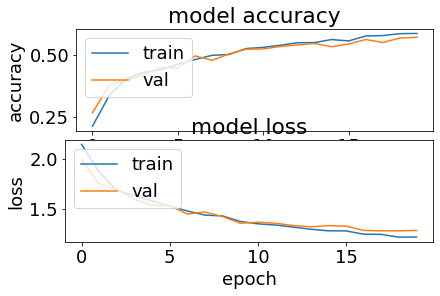

313/313 [==============================] - 4s 13ms/step
              precision    recall  f1-score   support

           0       0.62      0.72      0.67      1005
           1       0.79      0.74      0.76       974
           2       0.57      0.52      0.54      1032
           3       0.50      0.56      0.53      1016
           4       0.62      0.49      0.54       999
           5       0.52      0.64      0.58       937
           6       0.65      0.69      0.67      1029
           7       0.72      0.67      0.69      1001
           8       0.78      0.64      0.70      1025
           9       0.68      0.72      0.70       981

    accuracy                           0.64      9999
   macro avg       0.65      0.64      0.64      9999
weighted avg       0.65      0.64      0.64      9999

[[719  28  49  21  19  13  10  18  86  42]
 [ 37 719  13   8   4   7  20   7  36 123]
 [ 68   4 534  94  85  89  84  46  11  17]
 [ 22   4  71 572  42 181  72  25   6  21]
 [ 42   3 105

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
import sys

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=10000 # this selects the size of the training data. Change this to 5K 10K 20K 40K
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
	model = keras.Sequential()
	model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
	model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
	model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
	model.summary()

	batch_size = 128
	epochs = 20
	history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
	model.save("cifar.model")
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss'); plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))

#### With 20K data points:

orig x_train shape: (19999, 32, 32, 3)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_1 (Dense

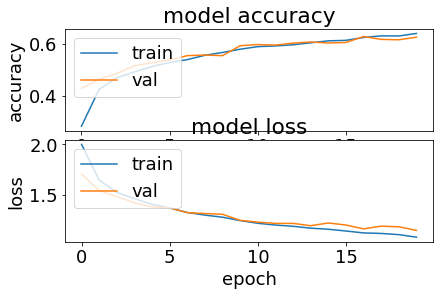

625/625 [==============================] - 8s 13ms/step
              precision    recall  f1-score   support

           0       0.66      0.78      0.71      1989
           1       0.86      0.75      0.80      1981
           2       0.66      0.52      0.58      2042
           3       0.56      0.54      0.55      2011
           4       0.64      0.60      0.62      2009
           5       0.55      0.71      0.62      1925
           6       0.83      0.72      0.77      2037
           7       0.74      0.76      0.75      2027
           8       0.76      0.82      0.79      2012
           9       0.77      0.79      0.78      1966

    accuracy                           0.70     19999
   macro avg       0.70      0.70      0.70     19999
weighted avg       0.70      0.70      0.70     19999

[[1546   22   45   38   26   25    8   21  195   63]
 [  96 1493   11   15    9   18    8   11   98  222]
 [ 188   11 1069  163  175  197   81   83   50   25]
 [  55    6   75 1091  107

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
import sys

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=20000 # this selects the size of the training data. Change this to 5K 10K 20K 40K
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
	model = keras.Sequential()
	model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
	model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
	model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
	model.summary()

	batch_size = 128
	epochs = 20
	history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
	model.save("cifar.model")
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss'); plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))

#### With 40K data points:

orig x_train shape: (39999, 32, 32, 3)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_2 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense

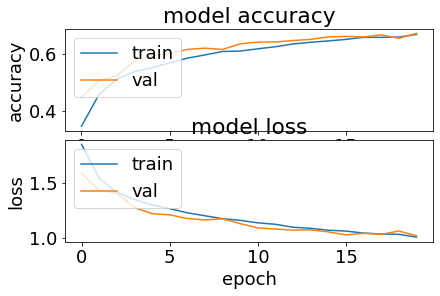

1250/1250 [==============================] - 17s 14ms/step
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      3986
           1       0.83      0.86      0.85      3986
           2       0.54      0.68      0.60      4048
           3       0.56      0.49      0.52      3984
           4       0.64      0.65      0.64      4003
           5       0.69      0.53      0.60      3975
           6       0.68      0.85      0.76      4019
           7       0.79      0.73      0.76      4023
           8       0.84      0.81      0.82      3997
           9       0.86      0.77      0.81      3978

    accuracy                           0.71     39999
   macro avg       0.72      0.71      0.71     39999
weighted avg       0.72      0.71      0.71     39999

[[2964   70  306   69   66   15   35   55  304  102]
 [ 129 3430   49   24   10    6   43   11   93  191]
 [ 218   23 2737  173  297  138  307   82   54   19]
 [  61   26  468 1955  

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
import sys

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=40000 # this selects the size of the training data. Change this to 5K 10K 20K 40K
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
	model = keras.Sequential()
	model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
	model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
	model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
	model.summary()

	batch_size = 128
	epochs = 20
	history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
	model.save("cifar.model")
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss'); plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))

## ii) b) iv): with different L1

n: 0.001
170498071/170498071 [==============================] - 3s 0us/step
orig x_train shape: (4999, 32, 32, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 dropout (Dropout)           (None, 8, 8, 32)          0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
        

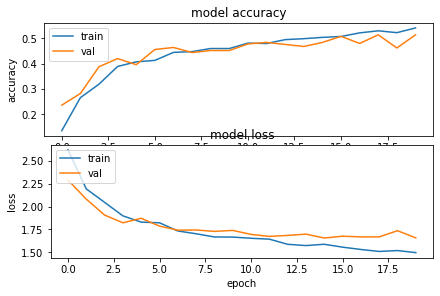

157/157 [==============================] - 2s 13ms/step
              precision    recall  f1-score   support

           0       0.63      0.58      0.61       505
           1       0.73      0.70      0.72       460
           2       0.42      0.63      0.50       519
           3       0.59      0.38      0.47       486
           4       0.53      0.47      0.50       519
           5       0.60      0.49      0.54       488
           6       0.59      0.65      0.62       518
           7       0.65      0.67      0.66       486
           8       0.60      0.73      0.66       520
           9       0.71      0.62      0.66       498

    accuracy                           0.59      4999
   macro avg       0.60      0.59      0.59      4999
weighted avg       0.60      0.59      0.59      4999

[[294  13  34   4  13   3   4  10 115  15]
 [ 11 322   9   3   8   3  13   8  39  44]
 [ 28   6 325  10  46  23  30  27  17   7]
 [  8   2  74 187  30  64  74  22  10  15]
 [ 24   5 117

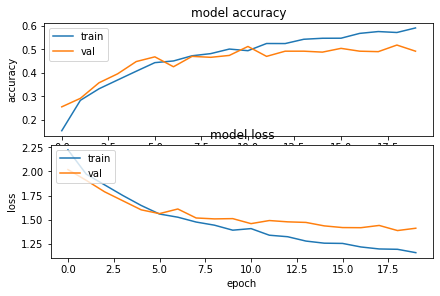

157/157 [==============================] - 2s 13ms/step
              precision    recall  f1-score   support

           0       0.75      0.53      0.62       505
           1       0.81      0.72      0.76       460
           2       0.56      0.54      0.55       519
           3       0.59      0.49      0.54       486
           4       0.54      0.51      0.53       519
           5       0.54      0.64      0.59       488
           6       0.63      0.72      0.67       518
           7       0.70      0.68      0.69       486
           8       0.69      0.76      0.72       520
           9       0.65      0.81      0.72       498

    accuracy                           0.64      4999
   macro avg       0.65      0.64      0.64      4999
weighted avg       0.64      0.64      0.64      4999

[[267  16  35   6  24   8   3  13  94  39]
 [  4 332   4   1  10   6  11   2  28  62]
 [ 15   5 282  27  51  40  47  28  16   8]
 [  3   2  29 239  33  88  50  14   6  22]
 [ 13   3  65

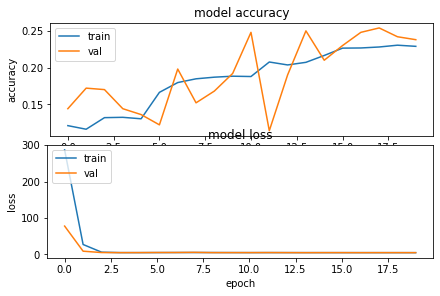

157/157 [==============================] - 2s 13ms/step
              precision    recall  f1-score   support

           0       0.41      0.09      0.15       505
           1       0.17      0.71      0.27       460
           2       0.75      0.01      0.01       519
           3       0.16      0.16      0.16       486
           4       0.13      0.02      0.04       519
           5       0.18      0.00      0.01       488
           6       0.25      0.82      0.38       518
           7       0.34      0.34      0.34       486
           8       0.28      0.10      0.15       520
           9       0.50      0.00      0.01       498

    accuracy                           0.22      4999
   macro avg       0.32      0.23      0.15      4999
weighted avg       0.32      0.22      0.15      4999

[[ 46 346   0  22   6   0  13  47  25   0]
 [  8 325   0  29   1   1  51  27  18   0]
 [ 10 141   3  70  14   1 252  25   3   0]
 [  3 152   0  79   7   2 221  18   3   1]
 [  6  75   0

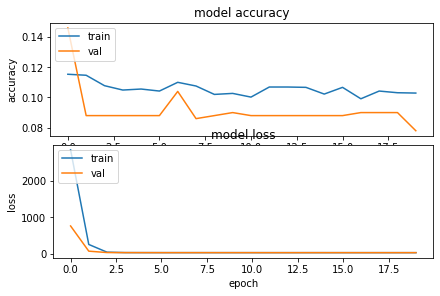

157/157 [==============================] - 2s 13ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       505
           1       0.00      0.00      0.00       460
           2       0.07      0.09      0.08       519
           3       0.00      0.00      0.00       486
           4       0.11      0.91      0.19       519
           5       0.00      0.00      0.00       488
           6       0.00      0.00      0.00       518
           7       0.00      0.00      0.00       486
           8       0.00      0.00      0.00       520
           9       0.00      0.00      0.00       498

    accuracy                           0.10      4999
   macro avg       0.02      0.10      0.03      4999
weighted avg       0.02      0.10      0.03      4999

[[  0   0  83   0 422   0   0   0   0   0]
 [  0   0  36   0 424   0   0   0   0   0]
 [  0   0  46   0 473   0   0   0   0   0]
 [  0   0 111   0 375   0   0   0   0   0]
 [  0   0  47   0 472   0   0   0   0   0]
 [  0   0 152   0 336   0 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_4 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)

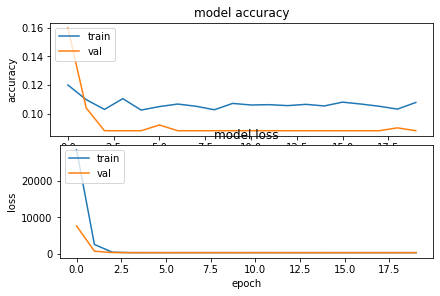

157/157 [==============================] - 2s 13ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       505
           1       0.00      0.00      0.00       460
           2       0.00      0.00      0.00       519
           3       0.00      0.00      0.00       486
           4       0.10      1.00      0.19       519
           5       0.00      0.00      0.00       488
           6       0.00      0.00      0.00       518
           7       0.00      0.00      0.00       486
           8       0.00      0.00      0.00       520
           9       0.00      0.00      0.00       498

    accuracy                           0.10      4999
   macro avg       0.01      0.10      0.02      4999
weighted avg       0.01      0.10      0.02      4999

[[  0   0   0   0 505   0   0   0   0   0]
 [  0   0   0   0 460   0   0   0   0   0]
 [  0   0   0   0 519   0   0   0   0   0]
 [  0   0   0   0 486   0   0   0   0   0]
 [  0   0   0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


313/313 [==============================] - 4s 13ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.10      1.00      0.18      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

[[   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
n_values=[0.001,0,1,10,100]
for n_value in n_values:
  print("================================================================")
  print(f'n: {n_value}')
  plt.rc('font', size=10)
  plt.rcParams['figure.constrained_layout.use'] = True
  import sys

  # Model / data parameters
  num_classes = 10
  input_shape = (32, 32, 3)

  # the data, split between train and test sets
  (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
  n=5000
  x_train = x_train[1:n]; y_train=y_train[1:n]
  #x_test=x_test[1:500]; y_test=y_test[1:500]

  # Scale images to the [0, 1] range
  x_train = x_train.astype("float32") / 255
  x_test = x_test.astype("float32") / 255
  print("orig x_train shape:", x_train.shape)

  # convert class vectors to binary class matrices
  y_train = keras.utils.to_categorical(y_train, num_classes)
  y_test = keras.utils.to_categorical(y_test, num_classes)

  use_saved_model = False
  if use_saved_model:
    model = keras.models.load_model("cifar.model")
  else:
    model = keras.Sequential()
    model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
    model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
    # model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(n_value))) # uses n here as 0.001,0,1,100
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
    model.summary()

    batch_size = 128
    epochs = 20
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    model.save("cifar.model")
    plt.subplot(211)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss'); plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

  preds = model.predict(x_train)
  y_pred = np.argmax(preds, axis=1)
  y_train1 = np.argmax(y_train, axis=1)
  print(classification_report(y_train1, y_pred))
  print(confusion_matrix(y_train1,y_pred))

  preds = model.predict(x_test)
  y_pred = np.argmax(preds, axis=1)
  y_test1 = np.argmax(y_test, axis=1)
  print(classification_report(y_test1, y_pred))
  print(confusion_matrix(y_test1,y_pred))


## ii) c) i) Maxpool:

orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_41 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 conv2d_42 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 conv2d_43 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 16, 16, 32)        0         
               

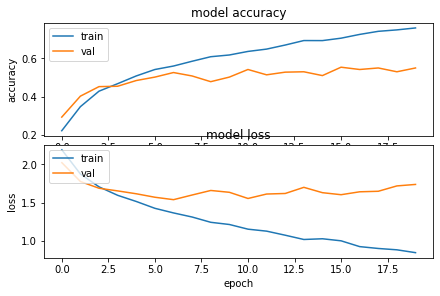

157/157 [==============================] - 6s 39ms/step
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       505
           1       0.92      0.90      0.91       460
           2       0.77      0.78      0.77       519
           3       0.85      0.71      0.77       486
           4       0.95      0.51      0.67       519
           5       0.78      0.83      0.80       488
           6       0.59      0.96      0.73       518
           7       0.87      0.87      0.87       486
           8       0.80      0.94      0.87       520
           9       0.96      0.81      0.88       498

    accuracy                           0.81      4999
   macro avg       0.84      0.81      0.81      4999
weighted avg       0.84      0.81      0.81      4999

[[403   4  18   5   0   3   9   7  53   3]
 [  4 415   2   0   0   2  15   2  13   7]
 [ 10   1 407  10   4  20  56   3   8   0]
 [  2   2  19 343   5  29  77   3   3   3]
 [ 18   2  47

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

plt.rc('font', size=10)
plt.rcParams['figure.constrained_layout.use'] = True
import sys

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=5000
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
  model = keras.Sequential()
  model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
  model.add(Conv2D(16, (3,3), padding='same', activation='relu'))
  # model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
  model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
  model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
  model.summary()

  batch_size = 128
  epochs = 20
  history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
  model.save("cifar.model")
  plt.subplot(211)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.subplot(212)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss'); plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))


## Dummy Classifier:

In [ ]:
from sklearn.dummy import DummyClassifier
# Dummy model
dummy_model = DummyClassifier(strategy="most_frequent").fit(x_train, y_train)
print("Dummy model")
preds_dummy = dummy_model.predict(x_train)
y_pred_dummy = np.argmax(preds_dummy, axis=1)
y_train1_dummy = np.argmax(y_train, axis=1)
print(classification_report(y_train1_dummy, y_pred_dummy))
print(confusion_matrix(y_train1_dummy, y_pred_dummy))

preds_dummy = dummy_model.predict(x_test)
y_pred_dummy = np.argmax(preds_dummy, axis=1)
y_test1_dummy = np.argmax(y_test, axis=1)
print(classification_report(y_test1_dummy, y_pred_dummy))
print(confusion_matrix(y_test1_dummy, y_pred_dummy))

Dummy model
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       505
           1       0.00      0.00      0.00       460
           2       0.00      0.00      0.00       519
           3       0.00      0.00      0.00       486
           4       0.00      0.00      0.00       519
           5       0.00      0.00      0.00       488
           6       0.00      0.00      0.00       518
           7       0.00      0.00      0.00       486
           8       0.10      1.00      0.19       520
           9       0.00      0.00      0.00       498

    accuracy                           0.10      4999
   macro avg       0.01      0.10      0.02      4999
weighted avg       0.01      0.10      0.02      4999

[[  0   0   0   0   0   0   0   0 505   0]
 [  0   0   0   0   0   0   0   0 460   0]
 [  0   0   0   0   0   0   0   0 519   0]
 [  0   0   0   0   0   0   0   0 486   0]
 [  0   0   0   0   0   0   0   0 519   0]
 [  0   0   0 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

## ii) d)

orig x_train shape: (49999, 32, 32, 3)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 8)         224       
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 8)         264       
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 16)        1168      
                                                                 
 conv2d_23 (Conv2D)          (None, 8, 8, 16)          2320      
                                                                 
 conv2d_24 (Conv2D)          (None, 8, 8, 32)          4640      
                                                                 
 conv2d_25 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 dropout_5 (Dro

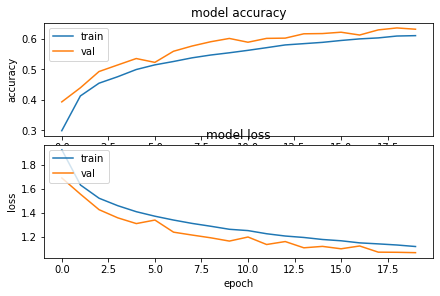

1563/1563 [==============================] - 17s 11ms/step
              precision    recall  f1-score   support

           0       0.74      0.68      0.71      5000
           1       0.80      0.76      0.78      5000
           2       0.60      0.52      0.56      5000
           3       0.46      0.45      0.46      5000
           4       0.63      0.54      0.58      5000
           5       0.51      0.64      0.57      5000
           6       0.81      0.60      0.69      4999
           7       0.59      0.79      0.68      5000
           8       0.81      0.77      0.79      5000
           9       0.69      0.77      0.73      5000

    accuracy                           0.65     49999
   macro avg       0.66      0.65      0.65     49999
weighted avg       0.66      0.65      0.65     49999

[[3408  117  253  119  104   57   26  155  455  306]
 [  95 3814   31   46   18   31   28   63  107  767]
 [ 287   25 2583  424  488  476  191  366   95   65]
 [  71   30  321 2274  

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

plt.rc('font', size=10)
plt.rcParams['figure.constrained_layout.use'] = True
import sys

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=50000
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
  model = keras.Sequential()

  model = keras.Sequential()
  model.add(Conv2D(8, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
  model.add(Conv2D(8, (2,2),strides =(2,2) , padding='same', activation='relu'))
  model.add(Conv2D(16, (3,3), padding='same', activation='relu'))
  model.add(Conv2D(16, (3,3), strides =(2,2) , padding='same', activation='relu'))
  model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
  model.add(Conv2D(32, (3,3), strides =(2,2) ,padding='same', activation='relu'))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
  model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
  model.summary()

  batch_size = 128
  epochs = 20
  history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
  model.save("cifar.model")
  plt.subplot(211)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.subplot(212)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss'); plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))